1.1 Скачать следующие данные: kc-house-data и laptop_price

In [1]:
import pandas as pd

In [8]:
df_houses = pd.read_csv('https://raw.githubusercontent.com/Pachuchka/python_for_analytics/main/kc_house_data.csv', sep=',', encoding='UTF-8')
df_houses.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df_laptop = pd.read_csv('https://raw.githubusercontent.com/Pachuchka/python_for_analytics/main/laptop_price.csv', sep=',', encoding='Windows-1251')
df_laptop.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


1.2 Изучите стоимости недвижимости


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter

In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [22]:
df_houses['price'].describe()

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

Text(0, 0.5, 'количество домов')

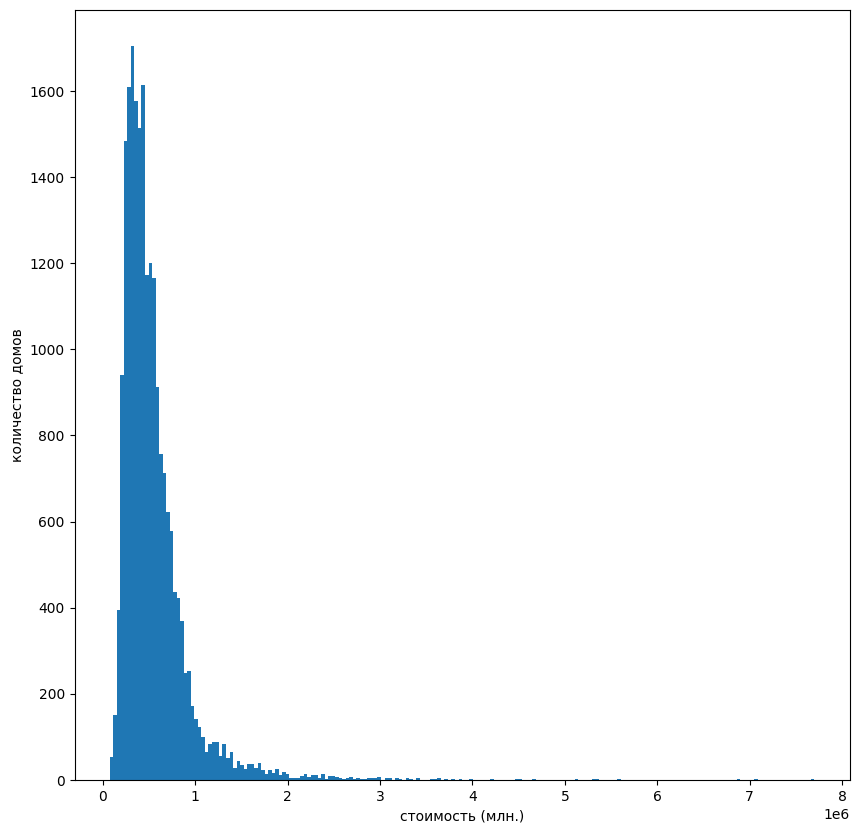

In [68]:
plt.figure(figsize=(10,10))
plt.hist(df_houses['price'], bins = 200)
plt.xlabel('распределение стоимости жилья')
plt.xlabel('стоимость (млн.)')
plt.ylabel('количество домов')


Подавляющее число домов обладают стоимостью менее 1 млн. условных единиц, относительно равномерно распределены в стоимостном диапазоне между 75 тыс. у.е и 1 млн. у.е.


1.3. Изучите распределение квадратуры жилой

In [72]:
df_houses['sqft_living'].describe()

count   21613.00
mean     2079.90
std       918.44
min       290.00
25%      1427.00
50%      1910.00
75%      2550.00
max     13540.00
Name: sqft_living, dtype: float64

Text(0, 0.5, 'количество домов')

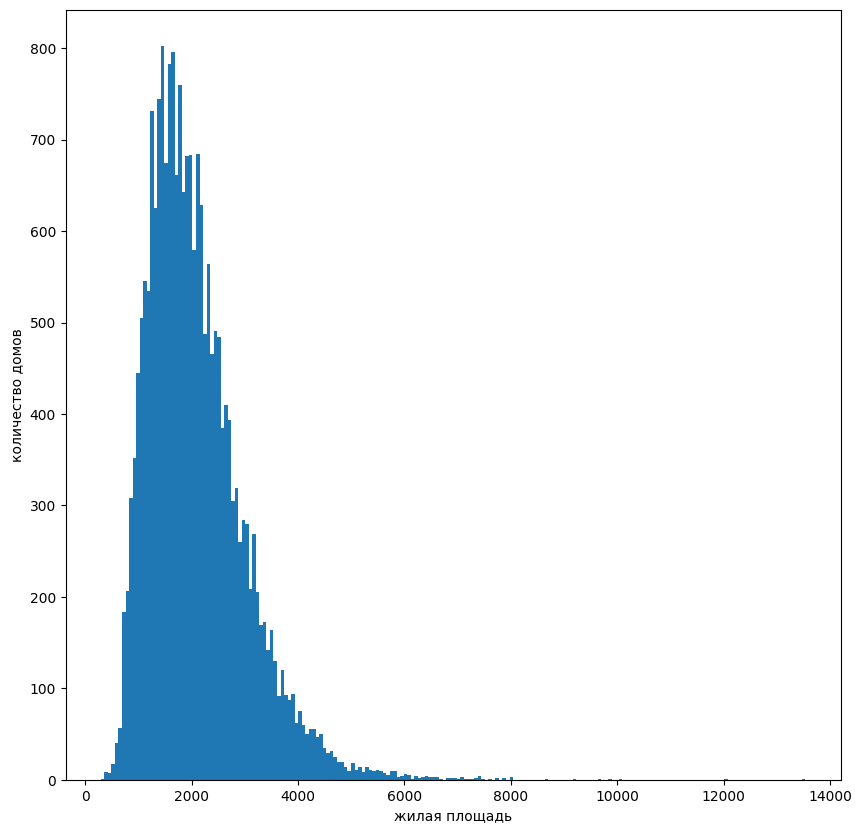

In [88]:
plt.figure(figsize=(10,10))
plt.hist(df_houses['sqft_living'], bins = 200)
plt.xlabel('распределение жилой площади домов')
plt.xlabel('жилая площадь')
plt.ylabel('количество домов')


Имеем равномерное распределение жилой площадки на промежутке от 300 квадратных единиц, до 4500 квадратных единиц, затем на промежутке от 4500 кв. ед до 6000 - несколько десятков лотом и единичные предложения квадратурой более 6000. Есть единичные предложения квадратурой свыше 12000.

1.4. Изучите распределение года постройки

Text(0, 0.5, 'количество домов')

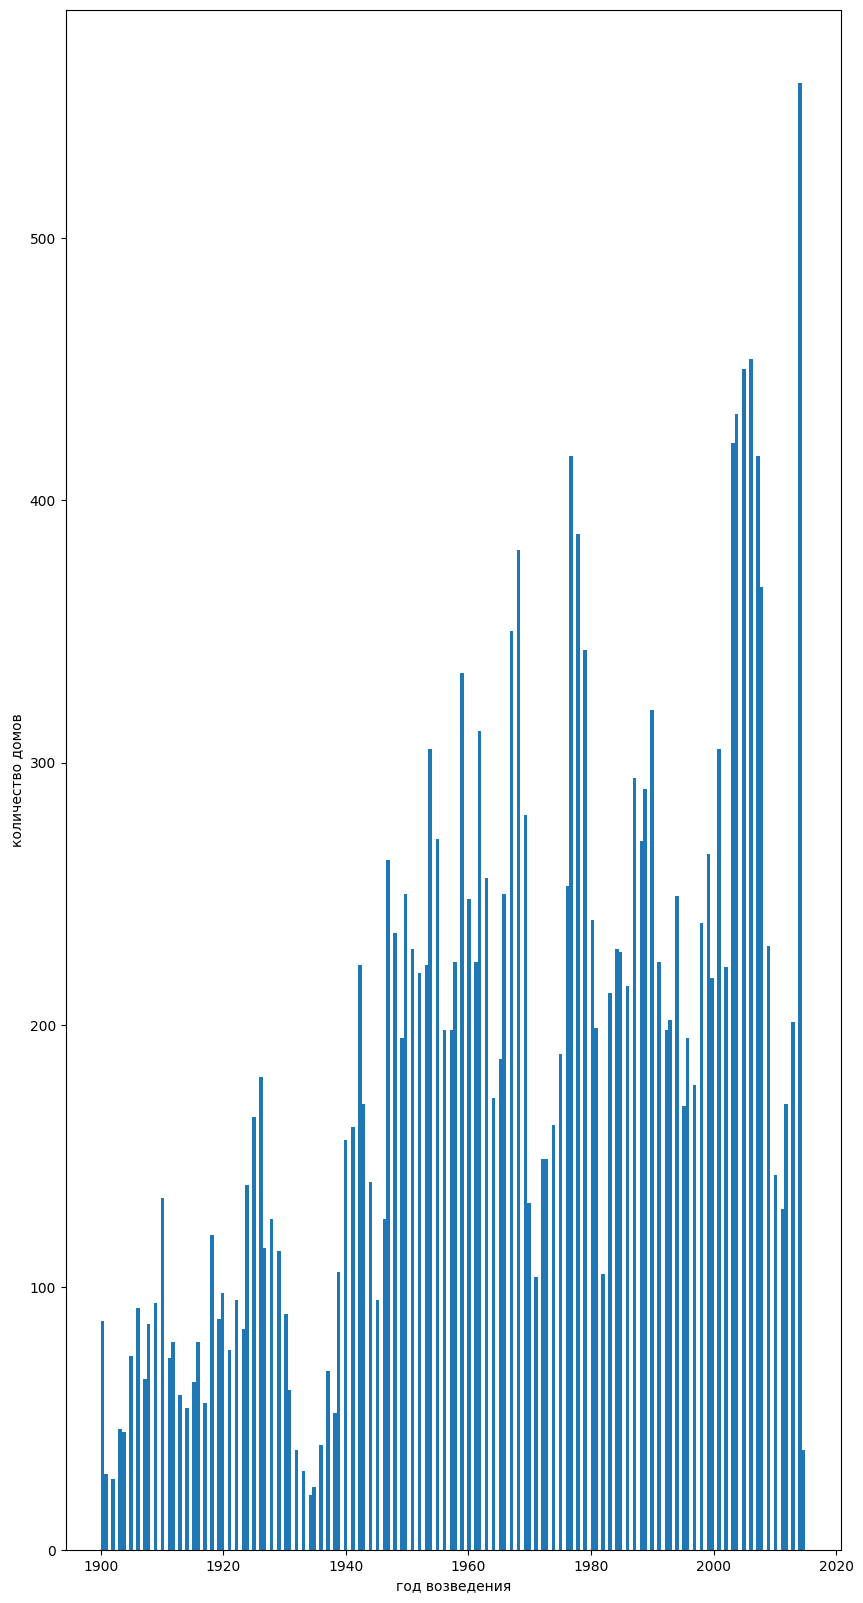

In [75]:
plt.figure(figsize=(10,20))
plt.hist(df_houses['yr_built'], bins = 200)
plt.xlabel('распределение жилой площади домов')
plt.xlabel('год возведения')
plt.ylabel('количество домов')


В выборке явно преобладают дома постоенные после 2000 года, в целом видна динамика по увеличению количества возведённых зданий с течением времени, пик строительства приходится на на второе десятиление 21 века (2013-2015 год). Наблюдаются спады числа стрящихся домов во второй половине 1930-ых, 1970-ых, короткий спад в начале 1980 -ых, что может создавать дефицит предложений для конкретных годов.

2.1. Изучите распределение домов от наличия вида на набережную

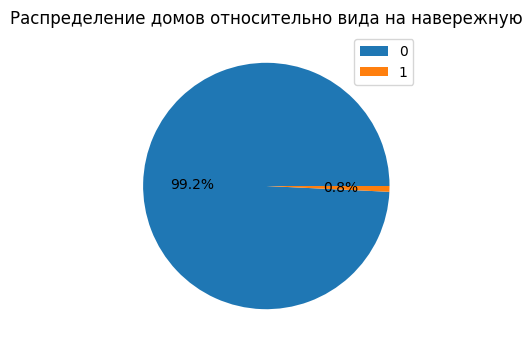

In [81]:
plt.figure(figsize=(6,4))
plt.pie(df_houses['waterfront'].value_counts(), autopct='%1.1f%%')
plt.title('Распределение домов относительно вида на навережную')
plt.legend(df_houses['waterfront'].index)

лишь 0,8% домов имеют вид на набережную что довольно редко.  

Оценим влияние наличия вида на набережную на стоимость дома

In [87]:
import numpy as np
data = pd.crosstab(df_houses['price'],df_houses['waterfront']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0:'no',1:'yes'},inplace=True)
data.head



<bound method NDFrame.head of waterfront      price   no  yes
1683        450000.00  172    0
1113        350000.00  172    0
2150        550000.00  159    0
1923        500000.00  151    1
1541        425000.00  149    1
...               ...  ...  ...
3995       3070000.00    0    1
3996       3075000.00    0    1
3998       3120000.00    0    1
3800       1637500.00    0    1
3969       2574000.00    0    1

[4028 rows x 3 columns]>

In [91]:
df_houses.groupby('waterfront').agg({'price':['min','max','mean']})

price                      
                 min        max       mean
waterfront                                
0           75000.00 7700000.00  531563.60
1          285000.00 7062500.00 1661876.02

Действительно, наличие вида на набережную влияет на стоимость дома

Text(0, 0.5, 'количество домов')

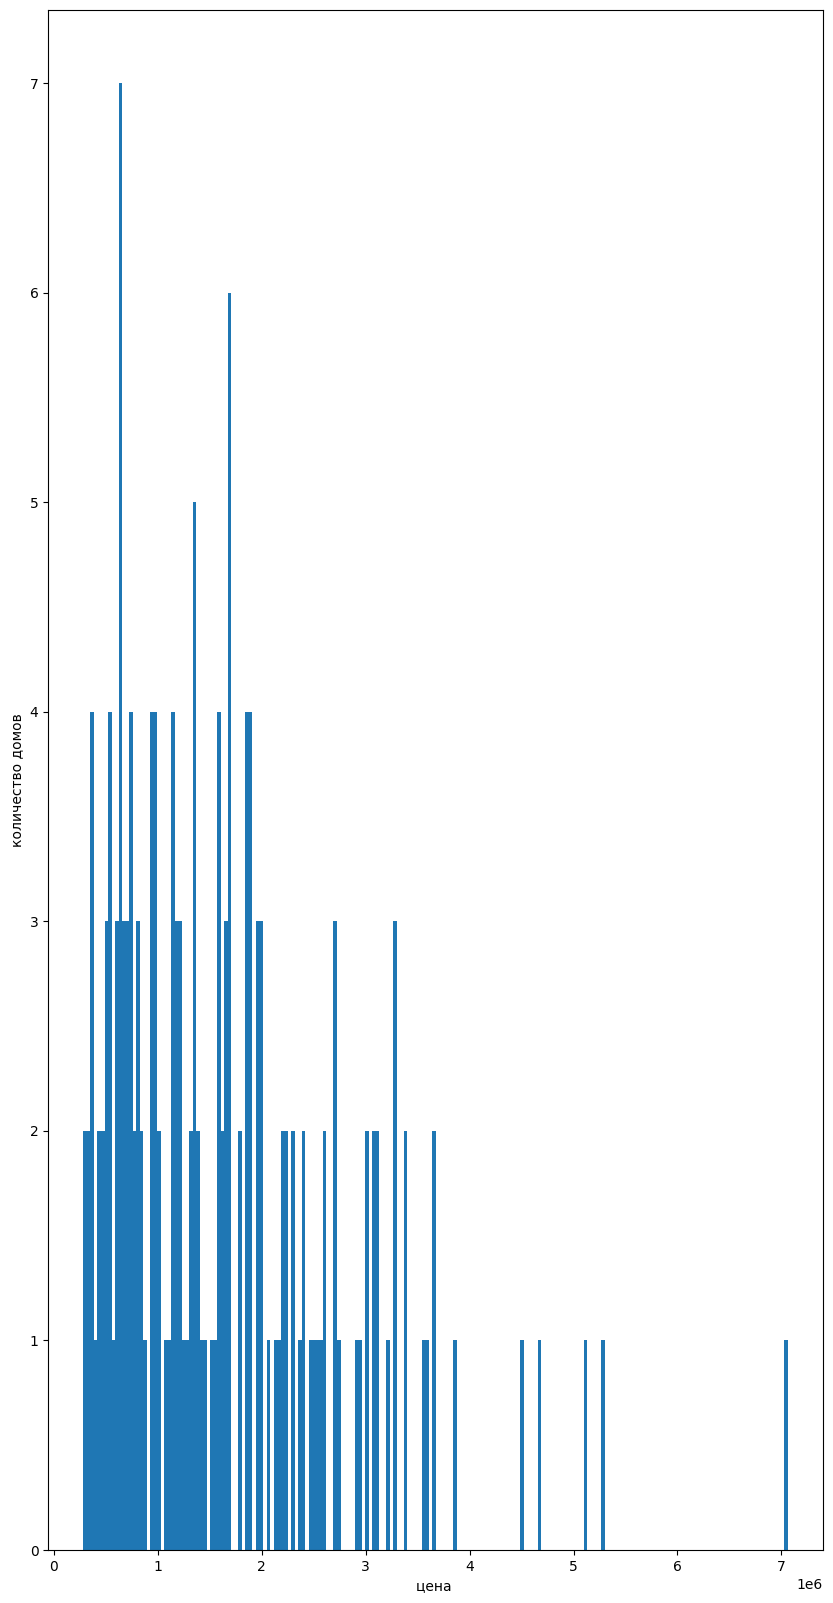

In [93]:
data = df_houses[(df_houses['waterfront']==1)]
plt.figure(figsize=(10,20))
plt.hist(data['price'], bins = 200)
plt.xlabel('распределение стоимостей жилья с видом на набережную')
plt.xlabel('цена (млн.)')
plt.ylabel('количество домов')

2.2. Изучите распределение этажей домов

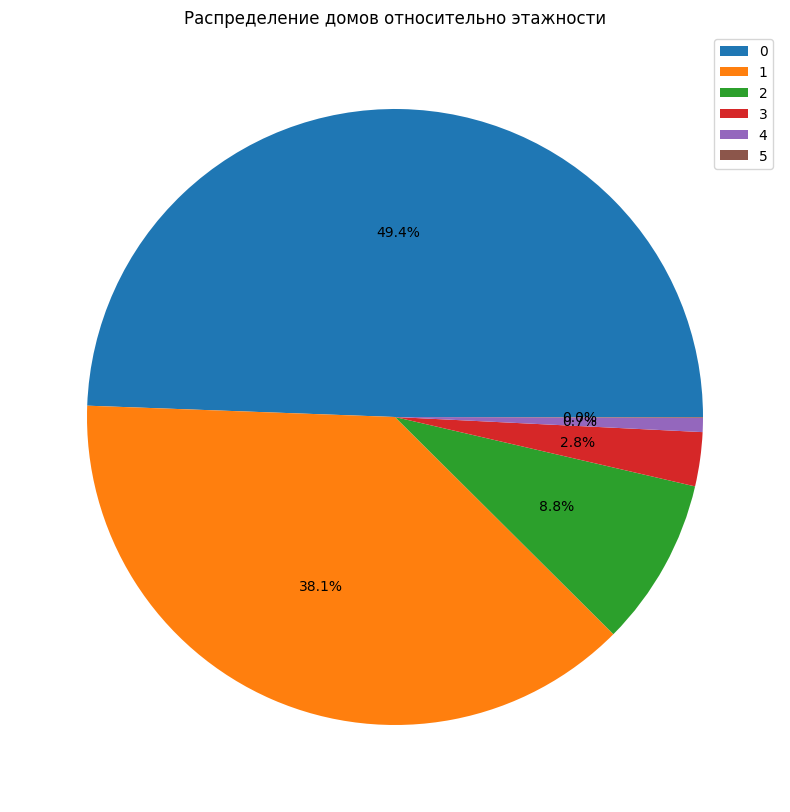

In [104]:
plt.figure(figsize=(10,10))
plt.pie(df_houses['floors'].value_counts(), autopct='%1.1f%%')
plt.title('Распределение домов относительно этажности')
plt.legend(df_houses['floors'].index)

не репрезентативно, используем другой способ

Text(0, 0.5, 'количество домов')

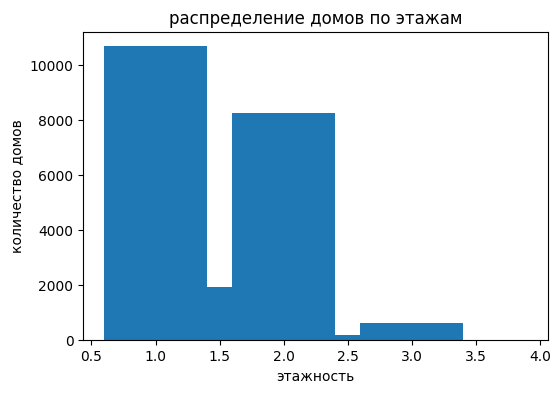

In [106]:
data = df_houses['floors'].value_counts().reset_index()
plt.figure(figsize=(6,4))
plt.bar(data['index'], data['floors'])
plt.title('распределение домов по этажам')
plt.xlabel('этажность')
plt.ylabel('количество домов')



Наибольшее число домов имеют 1 этаж, 2 этажа так же не редкость. В силу не понятных причин есть полутора этажные дома, а так же дома с этажностью 2,5 - это странно

2.3. Изучите распределение состояния домов

Text(0, 0.5, 'количество домов')

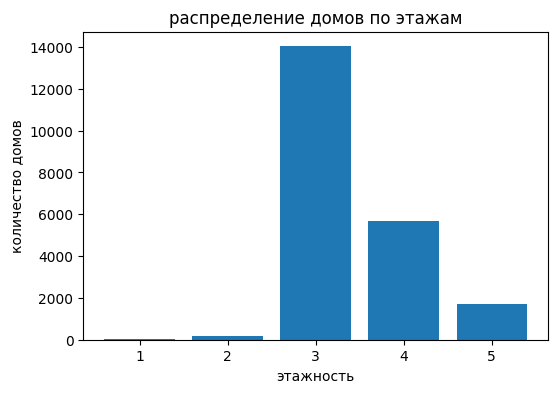

In [125]:
data = df_houses['condition'].value_counts().reset_index()
plt.figure(figsize=(6,4))
plt.bar(data['index'], data['condition'])
plt.title('распределение домов по этажам')
plt.xlabel('этажность')
plt.ylabel('количество домов')


Домов с оценкой состояния = 3 наибольшее количество - оценки 1 и 2 встречаются крайне редко

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Для начала оцени распределение цен в зависимости от оценки состояния


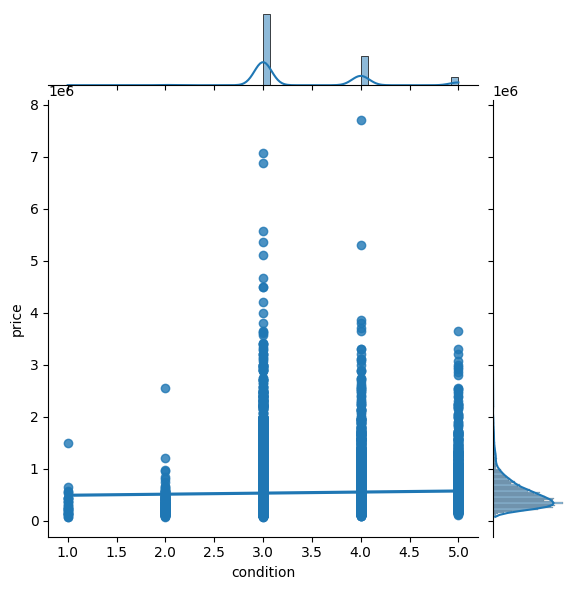

In [137]:
sns.jointplot(x=df_houses['condition'],y=df_houses['price'], kind = 'reg')

Text(0, 0.5, 'price')

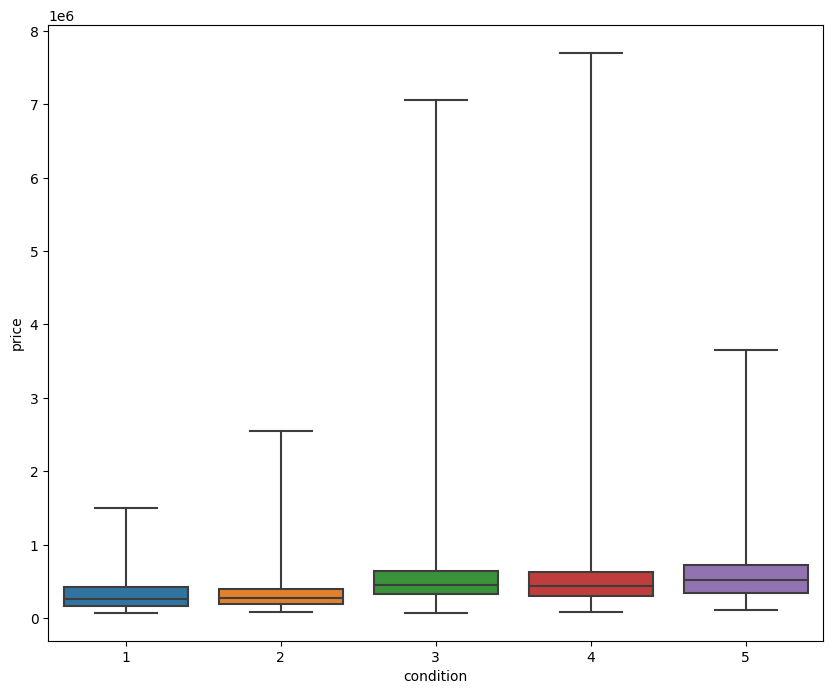

In [136]:
plt.figure(figsize = (10,8))
sns.boxplot(x=df_houses['condition'],y=df_houses['price'],whis = 100)
plt.xlabel('condition')
plt.ylabel('price')

В целом, кроме того что цена на дома с оценкой состояния 1 и 2 существенно ниже чем за дома с более высокой оценкой, явной зависимости нет. Можно сделать вывод, что состояние дома 1 и 2 существенно снижает его стоимость, но для оценки состояния более 2 имеются другие, более важные факторы, влияющие на цену недвижимости



Рассмотрим другие зависимости, например распределение цен, в зависимости от этажности здания

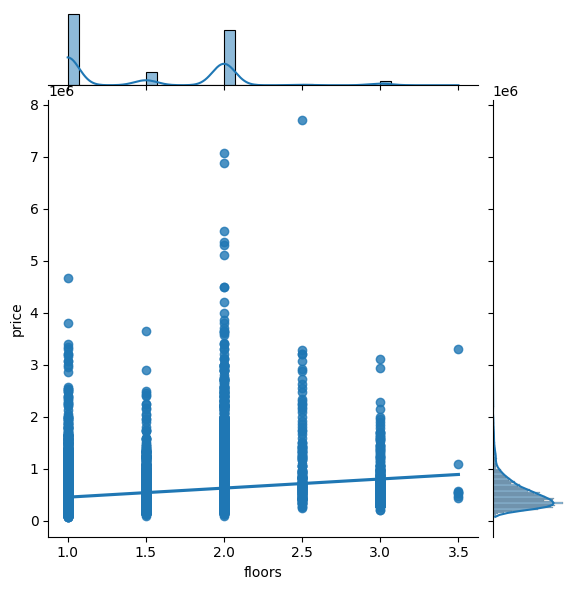

In [141]:
sns.jointplot(x=df_houses['floors'],y=df_houses['price'], kind = 'reg')

Наиболее дорогая недвижимость является двух и трёх этажной, однако это единичные дома, в основной массе явной зависимости стоимости от этажности так же нет



теперь сравним стоимость в зависимости от жилой площади

Text(0, 0.5, 'price')

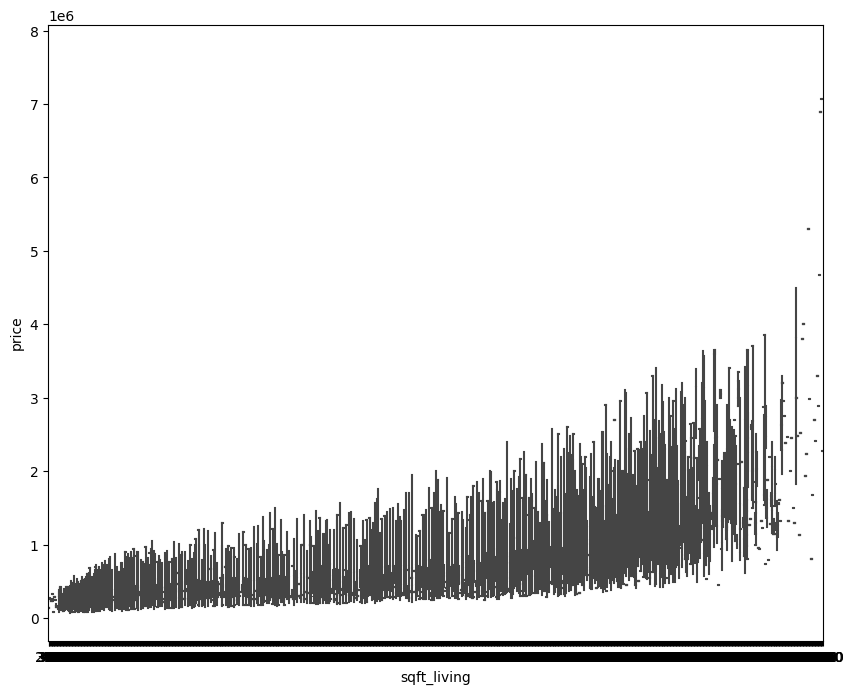

In [140]:
plt.figure(figsize = (10,8))
sns.boxplot(x=df_houses['sqft_living'],y=df_houses['price'],whis = 100)
plt.xlabel('sqft_living')
plt.ylabel('price')

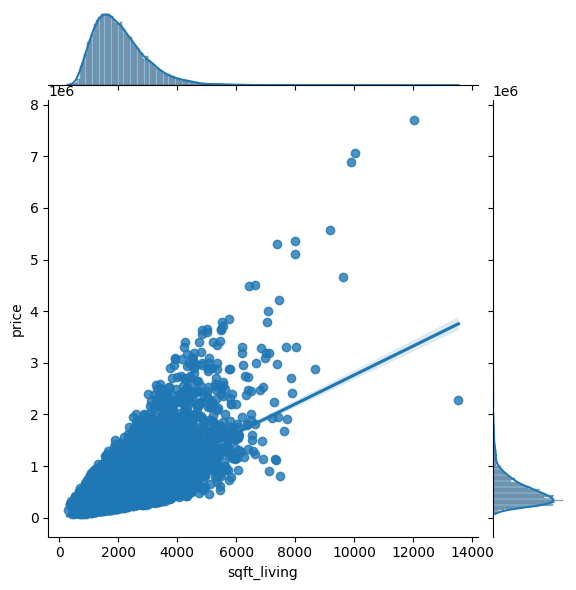

In [143]:
sns.jointplot(x=df_houses['sqft_living'],y=df_houses['price'], kind = 'reg')

Наблюдается явная зависимость стоимости от жилой площади - чем больше жилая площадь, тем дороже дом

Наличие подвала, а так же его площадь так же влияют на повышение стоимости, у наиболее дорогих домов площадь подвала более 1000 квадратных футов

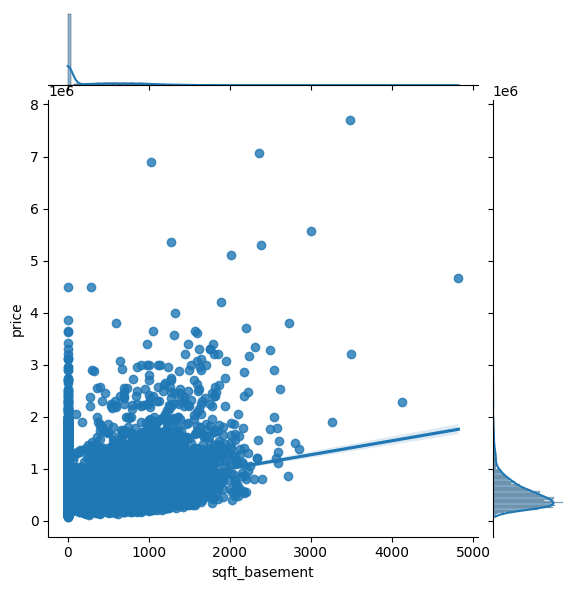

In [145]:
sns.jointplot(x=df_houses['sqft_basement'],y=df_houses['price'], kind = 'reg')

Среди наиболее дорогих домов за исключением единичных случаев - дома построенные после 1980 года, однако нельзя сказать что имеется сильная зависимость цены от года постройки, большинство ценовых предложений равномерно распределены по году строительства

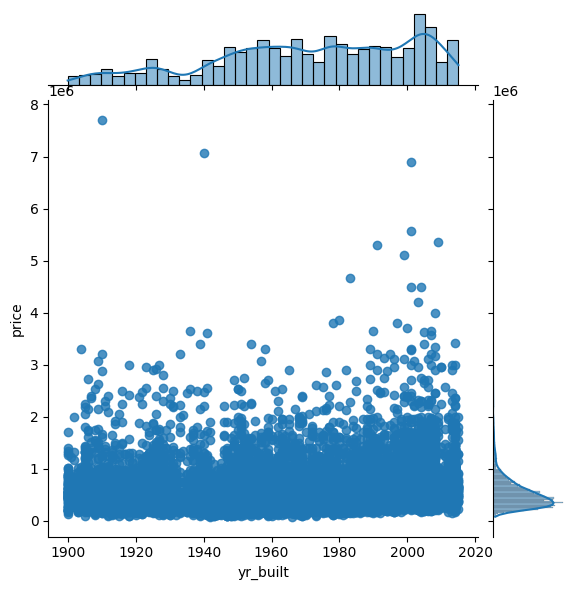

In [147]:
sns.jointplot(x=df_houses['yr_built'],y=df_houses['price'], kind = 'reg')

Можно установить, что на стоимость жилья так же влияет вид (из окна видимо), средняя стоимость дома с видом оцениваемым на 4 балла существенно выше

Text(0, 0.5, 'price')

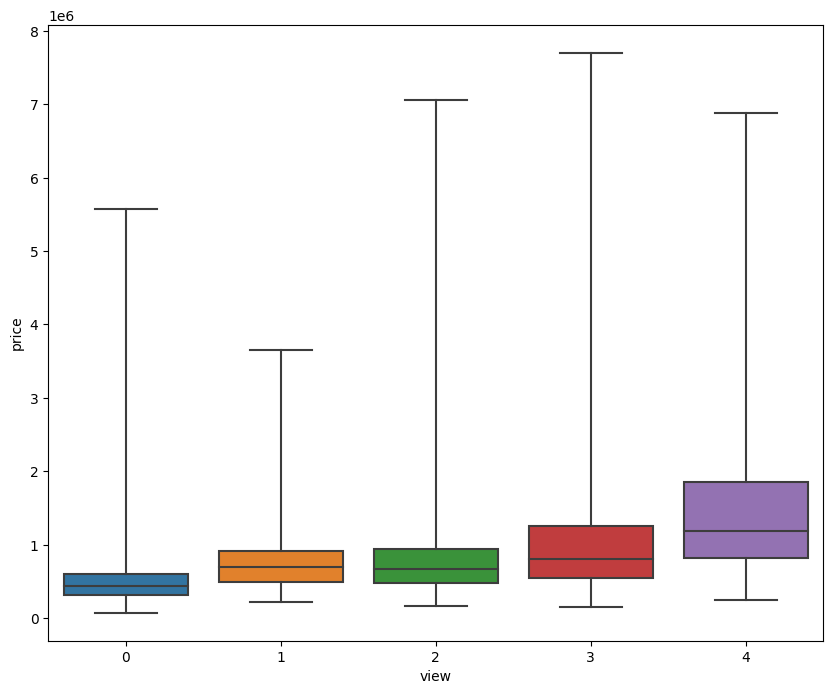

In [152]:
plt.figure(figsize = (10,8))
sns.boxplot(x=df_houses['view'],y=df_houses['price'],whis = 100)
plt.xlabel('view')
plt.ylabel('price')

В заключение можно сказать, что:

1.   Одного ключевого параметра, определяющего стоимость жилья нет
2.   Наибольшим образом на увеличение стоимости влияют ряд вакторов, таких как оценка состояния (должна быть больше двух), наличие подвала, жилая площадь и вид из окна
3.   Наиболее дорогие дома имеют вторичные признаки влияющие на стоимость и могут выбиваться из общей картины

